## 6장-3절. DBSCAN(Density Based Spatial Clustering of Applications With Noise)
- 밀도 기반 군집화 알고리즘
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다.
    - 예) 원 모양 형태의 분포
- 하이퍼파라미터
    - eps
        - 입실론 주변 영역의 반경을 의미
        - 일반적으로 1이하
        - 클수록 반경이 커져 포함하는 데이터 수가 많아진다. 즉, 노이즈(이상치) 데이터 개수가 줄어듬
        
    - min_samples
        - 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미한다. (자신 데이터 포함)
        - 클수록 주어진 반경 내에서 더 많은 데이터를 포함시켜야 함으로 노이즈(이상치) 데이터가 커지게 된다. 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문

In [46]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
from sklearn.datasets import load_iris

iris = load_iris()
irisDF = pd.DataFrame(iris.data, columns=['Sepal length','Sepal width','Petal length','Petal width'])
irisDF['target'] = iris.target
irisDF.head()

,Sepal length,Sepal width,Petal length,Petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=5)
predict = pd.DataFrame(model.fit_predict(irisDF.iloc[:,0:4]))
predict.columns = ['predict']

irisDF_DBS = pd.concat([irisDF,predict],axis=1)
irisDF_DBS.head()

,Sepal length,Sepal width,Petal length,Petal width,target,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


### 예측 데이터 시각화

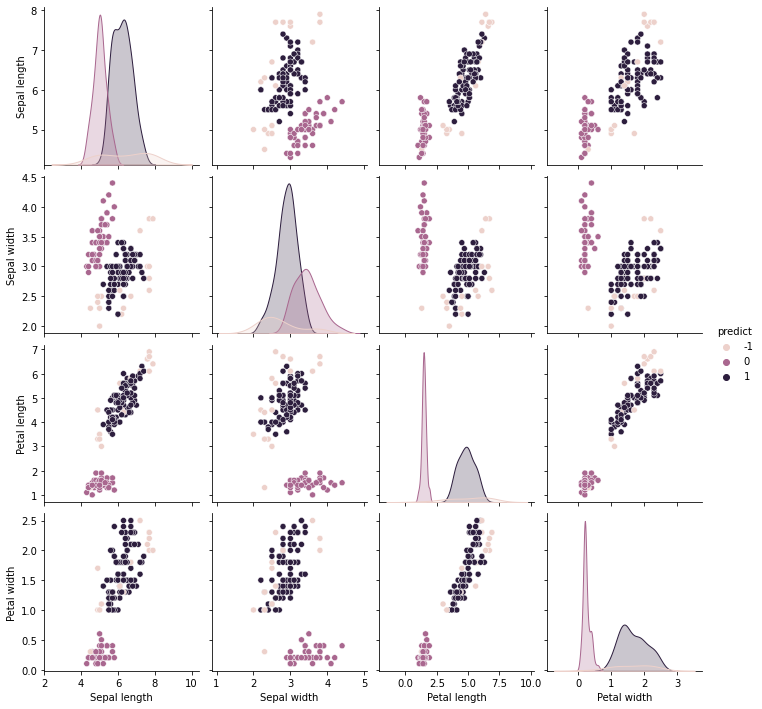

In [22]:
sns.pairplot(irisDF_DBS.iloc[:,[0,1,2,3,-1]],hue='predict')
plt.show()

### 실제 데이터 시각화

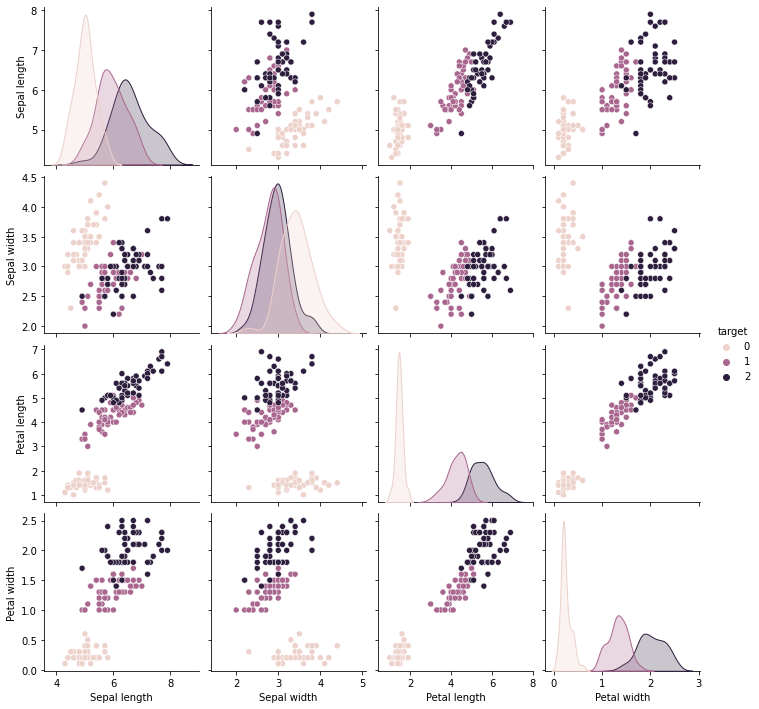

In [31]:
sns.pairplot(irisDF_DBS.iloc[:,[0,1,2,3,4]],hue='target')
plt.show()

## 실루엣 평가

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score

print(silhouette_score(irisDF.iloc[:,0:4],predict))

0.48603419703456835


In [50]:
s_coefs = silhouette_samples(irisDF.iloc[:,0:4],predict)

irisDF_DBS['silhouette'] = s_coefs
irisDF_DBS.head()

,Sepal length,Sepal width,Petal length,Petal width,target,predict,silhouette
0,5.1,3.5,1.4,0.2,0,0,0.876795
1,4.9,3.0,1.4,0.2,0,0,0.842545
2,4.7,3.2,1.3,0.2,0,0,0.853906
3,4.6,3.1,1.5,0.2,0,0,0.833515
4,5.0,3.6,1.4,0.2,0,0,0.873442


In [53]:
irisDF_DBS.groupby('predict')['silhouette'].mean()

predict
-1   -0.259664
 0    0.831133
 1    0.435642
Name: silhouette, dtype: float64